In [1]:
# https://www.data.go.kr/data/3048950/fileData.do
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 데이터 로드

In [3]:
df = pd.read_csv('C:/Users/ds/Desktop/파이썬/예제/src/recall.csv', encoding='euc-kr')

In [4]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


### 데이터 전처리

In [6]:
#결측치 확인
df.isnull().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [8]:
#결측치 확인
df.isna().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [9]:
# 중복데이터 확인
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [10]:
#중복 데이터 제거
df = df.drop_duplicates()

In [11]:
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유


In [12]:
# 날짜데이터를 정수형 데이터로 변환해서 리턴
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

In [13]:
df['start_year'] = df['생산기간(부터)'].apply(parse_year)

In [14]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014


In [15]:
df['start_month'] = df['생산기간(부터)'].apply(parse_month)

In [16]:
df['start_day'] = df['생산기간(부터)'].apply(parse_day)

In [17]:
df.head(2)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17


In [18]:
df['end_year'] = df['생산기간(까지)'].apply(parse_year)
df['end_month'] = df['생산기간(까지)'].apply(parse_month)
df['end_day'] = df['생산기간(까지)'].apply(parse_day)

In [19]:
df.head(2)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25


In [20]:
df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

In [21]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5


### 분석 

In [22]:
df.groupby('제작자').count()['차명'].sort_values(ascending=False)

제작자
비엠더블유코리아(주)         432
메르세데스벤츠코리아(주)       329
폭스바겐그룹코리아 주식회사      216
현대자동차(주)             61
만트럭버스코리아(주)          41
기아주식회사               38
포드세일즈서비스코리아(유)       37
(주)에프엠케이             31
스텔란티스코리아주식회사         31
(주)재규어랜드로버코리아        24
(유)기흥모터스             21
포르쉐코리아 주식회사          20
테슬라코리아 유한회사          20
화창상사(주)              16
혼다코리아(주)             15
(주)볼보자동차코리아          13
스카니아코리아그룹(주)          9
다임러트럭코리아(주)           9
르노코리아자동차 주식회사         7
한국토요타자동차(주)           5
(주)피라인                5
지엠코리아(주)              4
범한자동차 주식회사            4
볼보트럭코리아(주)            4
대전기계공업(주)             3
(주) 바이크코리아            3
한국지엠(주)               3
(주) 한국모터트레이딩          3
(주)다산중공업              2
모토스타코리아(주)            2
기흥인터내셔널 유한회사          1
유한회사 모토로싸             1
주식회사 마이브              1
(주)스포츠모터사이클코리아        1
폴스타오토모티브코리아 유한회사      1
한신특장                  1
Name: 차명, dtype: int64

In [23]:
pd.DataFrame(df.groupby('제작자').count()['차명'].sort_values(ascending=False)).rename(columns={'차명':'count'})

,count
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41
기아주식회사,38
포드세일즈서비스코리아(유),37
(주)에프엠케이,31
스텔란티스코리아주식회사,31


In [67]:
tmp = pd.DataFrame(df.groupby('제작자').count())

In [68]:
tmp.head()

,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
제작자,,,,,,,,,,,,,,
(유)기흥모터스,21,21,21,21,21,21,21,21,21,21,21,21,21,21
(주) 바이크코리아,3,3,3,3,3,3,3,3,3,3,3,3,3,3
(주) 한국모터트레이딩,3,3,3,3,3,3,3,3,3,3,3,3,3,3
(주)다산중공업,2,2,2,2,2,2,2,2,2,2,2,2,2,2
(주)볼보자동차코리아,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [27]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [34]:
sns.set(font = "Malgun Gothic", rc = {'axes.unicode_minus':False}, style='darkgrid')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '(유)기흥모터스'),
  Text(1, 0, '(주) 바이크코리아'),
  Text(2, 0, '(주) 한국모터트레이딩'),
  Text(3, 0, '(주)다산중공업'),
  Text(4, 0, '(주)볼보자동차코리아'),
  Text(5, 0, '(주)스포츠모터사이클코리아'),
  Text(6, 0, '(주)에프엠케이'),
  Text(7, 0, '(주)재규어랜드로버코리아'),
  Text(8, 0, '(주)피라인'),
  Text(9, 0, '기아주식회사'),
  Text(10, 0, '기흥인터내셔널 유한회사'),
  Text(11, 0, '다임러트럭코리아(주)'),
  Text(12, 0, '대전기계공업(주)'),
  Text(13, 0, '르노코리아자동차 주식회사'),
  Text(14, 0, '만트럭버스코리아(주)'),
  Text(15, 0, '메르세데스벤츠코리아(주)'),
  Text(16, 0, '모토스타코리아(주)'),
  Text(17, 0, '범한자동차 주식회사'),
  Text(18, 0, '볼보트럭코리아(주)'),
  Text(19, 0, '비엠더블유코리아(주)'),
  Text(20, 0, '스카니아코리아그룹(주)'),
  Text(21, 0, '스텔란티스코리아주식회사'),
  Text(22, 0, '유한회사 모토로싸'),
  Text(23, 0, '주식회사 마이브'),
  Text(24, 0, '지엠코리아(주)'),
  Text(25, 0, '테슬라코리아 유한회사'),
  Text(26, 0, '포드세일즈서비스코리아(유)'),
  Text(27, 0, '포르쉐코리아 주식회사'),
  Text(28, 0, '폭스

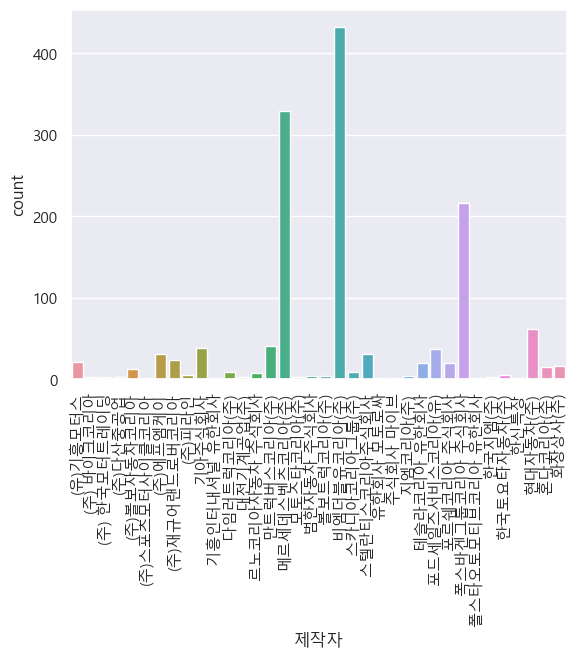

In [35]:
ax = sns.countplot(x = '제작자', data=df, order = tmp.index )
plt.xticks(rotation=90)

In [70]:
#모델별 리콜 현황
pd.DataFrame(df.groupby('차명').count()['start_year'].sort_values(ascending=False)).rename(columns={'start_year':'count'}).head(10)

,count
차명,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
S 580 4MATIC,10
S 350 d,10
C 200 4MATIC,9
GLE 300 d 4MATIC,9


In [71]:
tmp = pd.DataFrame(df.groupby('차명').count()['제작자'].sort_values(ascending=False))

In [75]:
tmp

,제작자
차명,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
S 580 4MATIC,10
S 350 d,10
C 200 4MATIC,9
GLE 300 d 4MATIC,9


In [76]:
tmp = tmp.rename(columns={'manufacturer' : 'count'}).iloc[:50]

In [77]:
tmp

,제작자
차명,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
S 580 4MATIC,10
S 350 d,10
C 200 4MATIC,9
GLE 300 d 4MATIC,9


In [78]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 328i to Q8 55 TFSI qu. Premium
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   제작자     50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes


In [79]:
plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '328i'),
  Text(1, 0, 'TGX'),
  Text(2, 0, 'TGS'),
  Text(3, 0, 'C 300'),
  Text(4, 0, '328xi'),
  Text(5, 0, 'S 580 4MATIC'),
  Text(6, 0, 'S 350 d'),
  Text(7, 0, 'C 200 4MATIC'),
  Text(8, 0, 'GLE 300 d 4MATIC'),
  Text(9, 0, 'S 400 d 4MATIC'),
  Text(10, 0, 'Maybach S 580 4MATIC'),
  Text(11, 0, 'S 500 4MATIC'),
  Text(12, 0, 'Model 3'),
  Text(13, 0, '520d'),
  Text(14, 0, '520d xDrive'),
  Text(15, 0, '스카니아카고'),
  Text(16, 0, 'E 450 4MATIC'),
  Text(17, 0, 'E 220 d 4MATIC'),
  Text(18, 0, 'GLC 220 d 4MATIC'),
  Text(19, 0, '타이칸'),
  Text(20, 0, 'GLS 400 d 4MATIC'),
  Text(21, 0, 'GLE 450 4MATIC'),
  Text(22, 0, 'EQS 450+'),
  Text(23, 0, 'GLC 300 4MATIC'),
  Text(24, 0, 'BMW X3 xDrive20d M Sport Package'),
  Text(25, 0, '320d Gran Turismo'),
  T

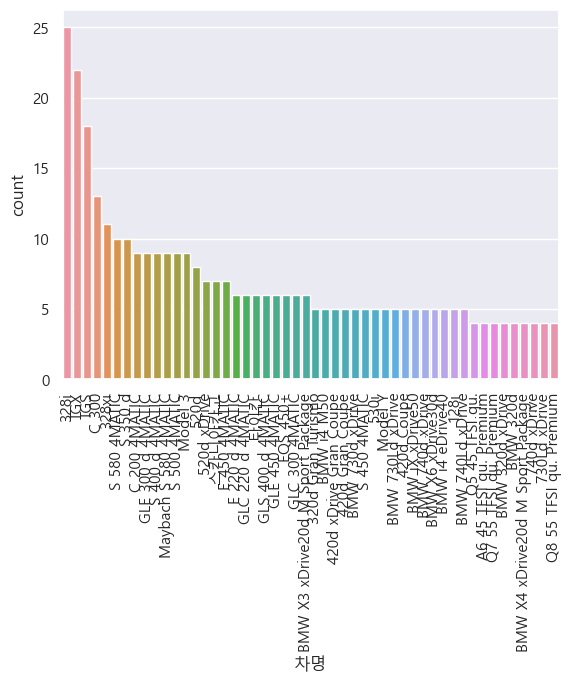

In [66]:
sns.set(font = "Malgun Gothic", rc = {'axes.unicode_minus':False}, style='darkgrid')
ax = sns.countplot(x = '차명', data = df[df.차명.isin(tmp.index)], order = tmp.index )
plt.xticks(rotation=90)